# Visualizing Internet Data

by: Christelle Inema

Adapted from: kb_and_mb_census_tract_vis_optimized.ipynb & fcc_analysis.ipynb

In [1]:
### helper functions ###

def merge_data(nhood_df, ctract_df, merged_df_path):
    '''
    This function takes the neighborhood data and census level data, merges them, and writes
    the merged df to a specified file location.
    
    Inputs:
      nhood_df: dataframe to go on outside (in this case neighborhood df)
      ctract_df: dataframe to go within the other df (census tract fcc_df)
    Returns:
      merged_df: merged dataframe, which this functions saves as csv to file location
    '''
    # should work if geographies are in the same format
    try:
        merged_df = gpd.sjoin(ctract_df, nhood_df, how="inner", op='intersects')
        merged_df.to_file(merged_df_path, driver="GeoJSON")
        return merged_df
    # if not we may need to change the crs of the neighborhood data
    except:
        nhood_df = nhood_df.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
        merged_df = gpd.sjoin(ctract_df, nhood_df, how="inner", op='intersects')
        merged_df.to_file(merged_df_path, driver="GeoJSON")
        return merged_df
        


def get_nhood_avgs(city_df, city_fcc_df, nhood_col):
    '''
    Updates df to have a column for the average broadband for each census tract
    '''
    nhood_avgs = {}
    
    normal_avgs = []
    city_bband_avg = []
    i = 0
    for nhood in city_df[nhood_col]:
        ctracts = city_fcc_df.loc[city_fcc_df[nhood_col] == nhood]
        nhood_avg = 0
        null_bband = 0
        for tract in list(ctracts['f_broadband']):
            if not math.isnan(tract):
                nhood_avg = nhood_avg + float(tract)
            else:
                null_bband += 1
        if null_bband == len(ctracts['f_broadband']):
            normal_avgs.append(math.nan)
        else:
            normal_avgs.append(nhood_avg / (len(ctracts['f_broadband']) - null_bband))
    
    city_df['bband_avg'] = normal_avgs
    
def plot_boxplots(city_fcc_df, nhood_col, title):
    '''
    Plot basic boxplot for city_fcc_df.
    
    Inputs:
      city_fcc_df: City fcc df (neighborhood data merged with FCC data)
      nhood_col: Column name for neighborhood indicators
      title: Title for boxplot figure
    
    Outputs:
      Boxplot
    '''
    
    city_fcc_df.boxplot(column='f_broadband', by=nhood_col, rot=90, figsize=(15,10), grid=False,
                       fontsize=8, color='green')
    plt.ylabel('f_broadband')
    plt.xlabel('Neighborhood Indicator')
    plt.title(title)
    plt.suptitle('')

In [2]:
#importing packages 
import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'..')  

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
import geopandas as gpd
import math
import pandas as pd
from geopandas import GeoDataFrame
import data_pipeline.spatial_operations as so
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 12]  # add more space to figures

In [5]:
#loading the city data + broadband  
broadband = gpd.read_file("./broadband.geojson")


## City One: Dallas 

In [6]:
dallas_df = gpd.read_file("./dallas/Councils/Councils.shp")

In [7]:
dallas_fcc_df = merge_data(dallas_df, broadband, "./dallas/city-merged.geojson")

In [13]:
dallas_fcc_df.head()
dallas_fcc_df.geometry.nunique()

383

In [15]:
#dallas_fcc_df.drop_duplicates(subset='geometry')

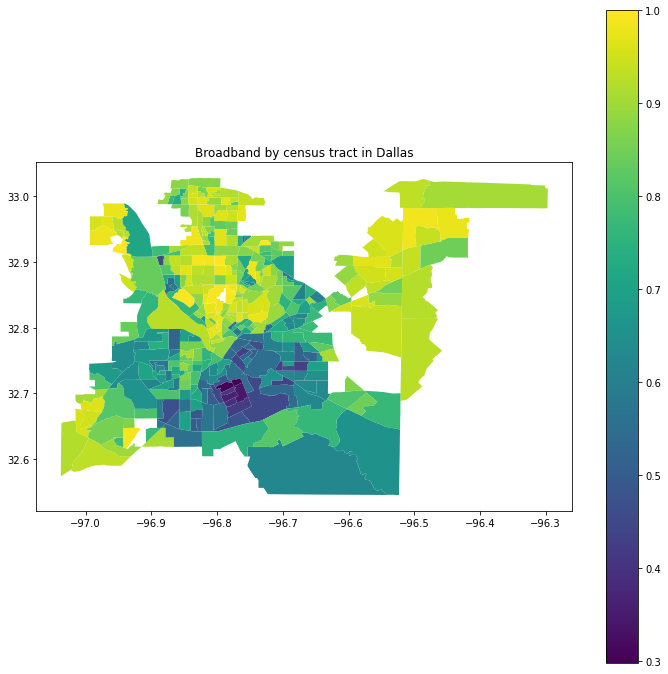

In [16]:
so.simple_map(dallas_fcc_df.drop_duplicates(subset='geometry'),'f_broadband','geoid','Broadband by census tract in Dallas')

## City two: Austin

In [8]:
austin_df = gpd.read_file("./austin/Neighborhoods/geo_export_81d98617-c469-49e1-9bf6-3ef25c07d0c6.shp")

In [9]:
austin_fcc_df = merge_data(austin_df, broadband, "./austin/city-merged.geojson")

## City three: San Diego 

In [10]:
san_d_df = gpd.read_file("./san_diego/CommunityPlanningAreas/cmty_plan_datasd.shp")

In [11]:
san_d_fcc_df = merge_data(san_d_df, broadband, "./san_diego/city-merged.geojson")

## City Four: San Jose

In [12]:
san_j_df = gpd.read_file("./san_jose/Zip_Code_Boundary/Zip_Code_Boundary.shp")

In [13]:
san_d_fcc_df = merge_data(san_j_df, broadband, "./san_jose/city-merged.geojson")

In [14]:
san_d_fcc_df.head(2)

,geoid,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,...,index_right,SANJOSELIM,OBJECTID,ZIPCODE,LASTUPDATE,LASTEDITOR,GlobalID,ENTERPRISE,SHAPE_Leng,SHAPE_Area
155,06085512042,5.467,5.267,1.667,1.133,0.133,0.133,1000.0,202.667,0.912,...,34,Yes,5234,95111,2021-08-05,JENNIFER.JAIN,{BEFF57C8-93BC-41E3-9DF7-E179A49B6A64},DPW-ZIPB-0000095111,74362.921057,1.507284e+08
4106,06085503211,4.583,4.208,1.792,1.042,0.042,0.042,1000.0,118.333,0.939,...,34,Yes,5234,95111,2021-08-05,JENNIFER.JAIN,{BEFF57C8-93BC-41E3-9DF7-E179A49B6A64},DPW-ZIPB-0000095111,74362.921057,1.507284e+08


In [8]:
#broadband subset 
broadband_sub = broadband [["geoid", "population", "f_broadband", "geometry"]]
broadband_sub.head(1)

,geoid,population,f_broadband,geometry
0,34005702808,3353.0,0.91,"POLYGON ((-74.90801 40.03250, -74.90496 40.036..."


In [11]:
#transforming crs 
#def transform_crs(data): 
    #new_data = data.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
    #return new_data

In [43]:
merge_sub_dallas = gpd.sjoin(dallas, broadband_sub, how = "left")
merge_sub_dallas = merge_sub_dallas[["geoid", "COUNCIL", "DISTRICT", "geometry", "population", "f_broadband"]]
merge_sub_dallas.head(10)

,geoid,COUNCIL,DISTRICT,geometry,population,f_broadband
0,48113010000,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",10393.0,0.926
0,48113004202,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",2138.0,0.838
0,48113006800,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",5232.0,0.718
0,48113004201,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",4047.0,0.857
0,48113002000,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",6264.0,0.754
0,48113004400,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",3536.0,0.909
0,48113006900,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",4311.0,0.610
0,48113020400,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",8535.0,0.881
0,48113004300,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",3052.0,0.854
0,48113020500,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",5531.0,0.524


In [55]:
#aggregates. 


#Now try to generalize the code: 
merge_sub_dallas["pop_broadband"] = pd.DataFrame(merge_sub_dallas.population * merge_sub_dallas.f_broadband) #col 1
#col2 with broadband 
merge_sub_dallas["total_pop_broadband"] = merge_sub_dallas['pop_broadband'].sum() 

#total population 
merge_sub_dallas["total_pop_neighborhood"] = merge_sub_dallas['population'].sum() 

#col 2/col 3 
merge_sub_dallas["broadband_neigh"] = pd.DataFrame(merge_sub_dallas.total_pop_broadband / merge_sub_dallas.total_pop_neighborhood)

merge_sub_dallas.head(2)

#https://towardsdatascience.com/tidying-up-pandas-4572bfa38776
#video 

#spatial merging option maybe? 
#equal weighting as baseline. 
#

,geoid,COUNCIL,DISTRICT,geometry,population,f_broadband,pop_broadband,total_pop_broadband,total_pop_neighborhood,broadband_neigh
0,48113010000,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",10393.0,0.926,9623.918,2185490.978,2832169.0,0.771667
0,48113004202,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",2138.0,0.838,1791.644,2185490.978,2832169.0,0.771667


In [53]:
council_group = merge_sub_dallas.groupby(['COUNCIL'])
council_group.head(1)

,geoid,COUNCIL,DISTRICT,geometry,population,f_broadband,total_pop_broadband
0,48113010000,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",10393.0,0.926,NaN
1,48113001600,2,2,"POLYGON ((-96.85673 32.87217, -96.85625 32.872...",4432.0,0.871,161199.0
2,48113006800,3,3,"POLYGON ((-96.98001 32.70587, -96.97850 32.705...",5232.0,0.718,214948.0
3,48113010000,4,4,"POLYGON ((-96.78676 32.75123, -96.78641 32.751...",10393.0,0.926,276906.0
4,48113017605,5,5,"POLYGON ((-96.70664 32.77839, -96.70601 32.778...",3773.0,0.668,176526.0
5,48113009605,6,6,"POLYGON ((-96.96757 32.94748, -96.96761 32.942...",3416.0,0.791,159097.0
6,48113003400,7,7,"POLYGON ((-96.66165 32.82139, -96.66165 32.821...",1261.0,0.539,250600.0
7,48113011101,8,8,"POLYGON ((-96.81427 32.64775, -96.81429 32.644...",4736.0,0.697,192981.0
8,48113018503,10,10,"POLYGON ((-96.68325 32.87899, -96.68357 32.878...",5997.0,0.779,197876.0
9,48113007804,11,11,"POLYGON ((-96.80345 32.98687, -96.80360 32.986...",6787.0,0.872,352995.0


In [68]:
council_group['f_broadband'].mean()
#council_group['f_broadband'].mea()

COUNCIL
1     0.746452
2     0.815824
3     0.680300
4     0.608730
5     0.612400
6     0.804655
7     0.640175
8     0.604294
9     0.838492
10    0.835206
11    0.873158
12    0.892784
13    0.890981
14    0.891765
Name: f_broadband, dtype: float64

In [58]:
#merge_sub_dallas = merge_sub_dallas.groupby('COUNCIL').agg(tot_pop = pd.NamedAgg(column = "population", aggfunc = "sum")) #, axis = 'index'
#merge_sub_dallas.head(10)

merge_sub_dallas["total_pop_broadband"] = merge_sub_dallas.groupby(['COUNCIL'])['population'].sum()
merge_sub_dallas.head(2)


,geoid,COUNCIL,DISTRICT,geometry,population,f_broadband,total_pop_broadband
0,48113010000,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",10393.0,0.926,NaN
0,48113004202,1,1,"POLYGON ((-96.80996 32.77139, -96.80970 32.771...",2138.0,0.838,NaN


In [28]:
#def merging(data, data_2): 
    #merged_data = gpd.sjoin(data, data_2, how = "left")
    #merged
    #return merged_data 
    #drop duplicates 

In [30]:
#merging(austin, broadband)

In [ ]:
#merging sjoin 
merged_austin = gpd.sjoin(austin, broadband, how = "left")
merged_dallas = gpd.sjoin(dallas, broadband, how = "left") #turns into nas when joined
merged_san_d = gpd.sjoin(san_d, broadband, how = "left") #turns into nas when joined
merged_san_j = gpd.sjoin(san_j, broadband, how = "left") #turns into nas when joined

#don't drop duplicates. 
#combine alll the tracts and the
#last column col2/col3 

In [17]:
merged_san_d.head(3) #geoid - census tract. 

,objectid,cpcode,cpname,acreage,geometry,index_right,geoid,n_isp,n_dn10,n_dn100,...,log_mhi,population,households,tests,devices,d_mbps,u_mbps,lat_ms,tests_per_cap,devices_per_cap
0,1,97,Military Facilities,22605.53105,"POLYGON ((-117.00700 32.87455, -117.00713 32.8...",69177,06073008511,2.864,2.308,1.923,...,11.36,4989.0,2149.0,719.14,267.69,236.17,111.13,17.27,0.144,0.054
0,1,97,Military Facilities,22605.53105,"POLYGON ((-117.00700 32.87455, -117.00713 32.8...",72600,06073009502,3.000,2.784,1.730,...,11.42,4216.0,1536.0,274.44,92.31,198.60,18.39,19.81,0.065,0.022
0,1,97,Military Facilities,22605.53105,"POLYGON ((-117.00700 32.87455, -117.00713 32.8...",64375,06073009505,3.141,2.974,1.962,...,11.70,7124.0,2755.0,426.33,168.59,183.54,15.46,18.72,0.060,0.024


In [52]:
#dropping duplicates 
merged_austin = merged_austin.drop_duplicates(subset=['neighname'])
merged_dallas = merged_dallas.drop_duplicates(subset=['COUNCILPER'])
merged_san_d = merged_san_d.drop_duplicates(subset=['cpname'])
merged_san_j = merged_san_j.drop_duplicates(subset=['ZIPCODE'])

In [67]:
#checking col names 
for col in merged_austin.columns:
     print(col)

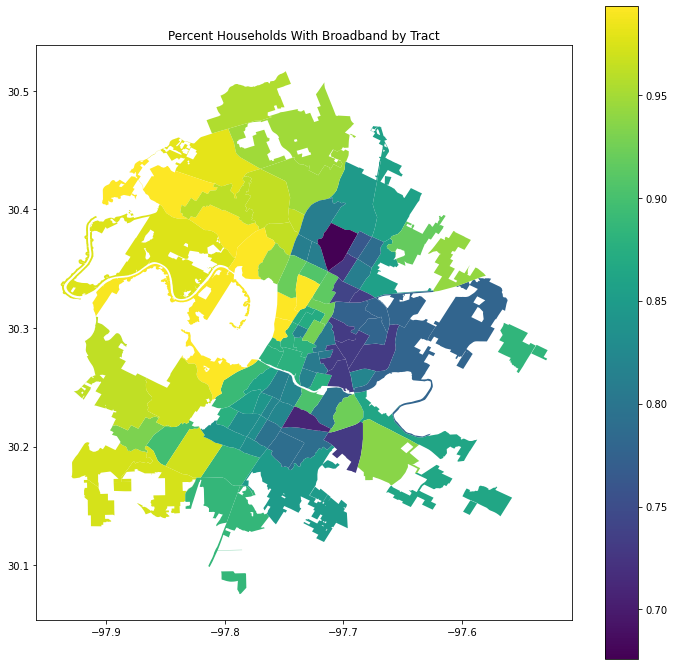

In [57]:
so.simple_map(merged_austin,'f_broadband','neighname','Percent Households with broadband internet in Austin')

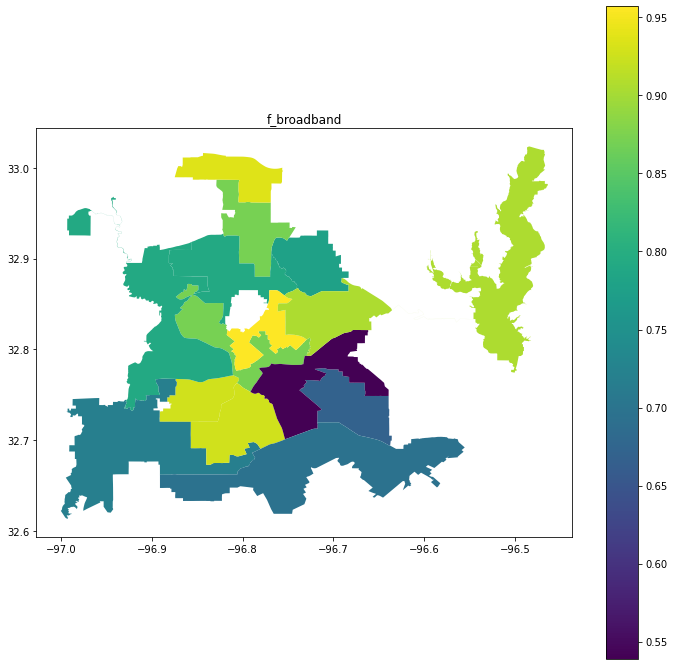

In [64]:
so.simple_map(merged_dallas,'f_broadband', 'COUNCIL', "Dallas Household Broadband by COUNCIL")

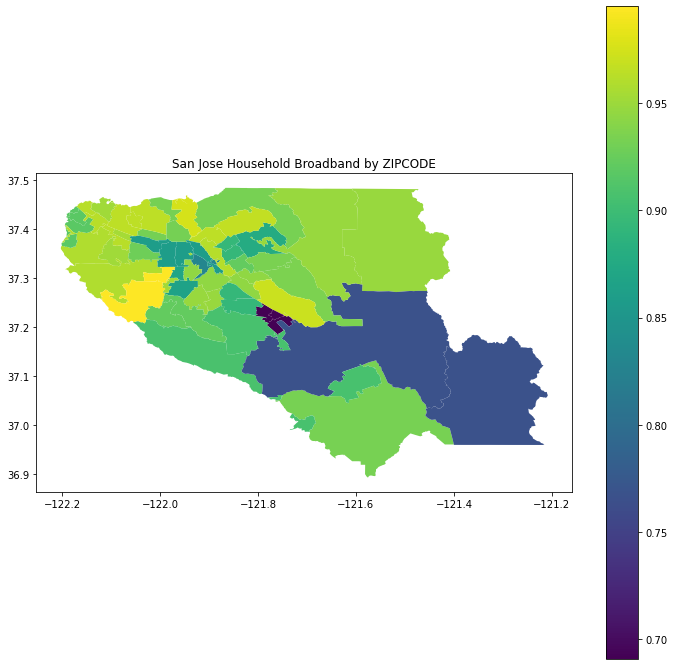

In [67]:
so.simple_map(merged_san_j,'f_broadband', 'ZIPCODE', "San Jose Household Broadband by ZIPCODE")

In [19]:
so.simple_map(merged_san_d,'f_broadband', 'cpcode', "San Jose Household Broadband by ZIPCODE")

ValueError: You have multiple data points for the same geographical unit. Combine these data points and try again.

In [108]:
#making a function to make the maps. avoiding repetition  
#the function needs 'f_broadband','neighname' and geometry ofc
#asking this during TA session 
#inconsistent shapefile formats? 

def access_map(data, col_2, col_3):
    new_crs = data.to_crs(epsg=4326)
    city_map = so.simple_map(col_2, col_3)
    return city_map 

x = access_map(merged_dallas, 'f_broadband', 'geoid')
x 
    

In [70]:
#the geometries are a little weird. maybe figuring out how to change them? 
#weighted averages vs weighted averages. 
#access_map(merged_austin,'Percent Households with broadband internet in Dallas')